In [11]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
parquet_file= r'C:\Users\verma\OneDrive\Desktop\PYTHON_DATA_PROJECT\1_Data_science_job_postings_dataset\0000.parquet'
df = pd.read_parquet(parquet_file, engine='auto')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [12]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [13]:
df_salary = df.copy()
yearly_median_salary = df_salary.salary_year_avg.median()
yearly_median_salary

115000.0

In [14]:
df_salary['salary_year_avg']=df_salary['salary_year_avg']
# .fillna(yearly_median_salary)

In [15]:
df_salary_mean = df_salary.pivot_table(index='job_country', columns='job_title_short', values='salary_year_avg',aggfunc='median')

In [16]:
# Calculating top 5 Countries with value counts
Top_5_country = df_salary.job_country.value_counts().head().index
Top_5_country.to_list()

['United States', 'India', 'United Kingdom', 'France', 'Germany']

In [17]:
df_job_country_salary = df_salary_mean.loc[Top_5_country]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0


In [18]:
top_job_titles = ['Data Analyst', 'Business Analyst', 'Data Engineer']

In [19]:
df_plot = df_job_country_salary[top_job_titles]
df_plot

job_title_short,Data Analyst,Business Analyst,Data Engineer
job_country,,,
United States,90000.0,90000.0,125000.0
India,100500.0,64800.0,147500.0
United Kingdom,87750.0,56700.0,110000.0
France,69175.0,89100.0,98301.5
Germany,103750.0,89100.0,147500.0


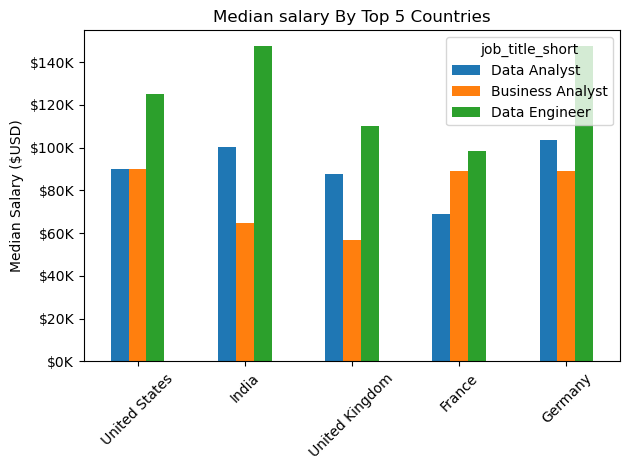

In [21]:
df_plot.plot(kind='bar')
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
plt.title('Median salary By Top 5 Countries')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.ylabel('Median Salary ($USD)')
plt.tight_layout()